##### 萬花筒影片效果
這篇教學會使用 OpenCV 裡翻轉影片和改變尺寸的功能，實作出一個有趣的萬花筒影片效果。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 鏡像合成影像 
使用 NumPy 產生全黑背景後，讀取攝影鏡頭的影像並改變影像尺寸，裁切出黑色背景一半尺寸的影像，將影像放在全黑背景的左邊，接著使用 flip 方法將這一半的影像水平翻轉，放在全黑背景的右邊，就實現了鏡像合成的效果。

* 參考：讀取並播放影片、翻轉影片、改變影片尺寸

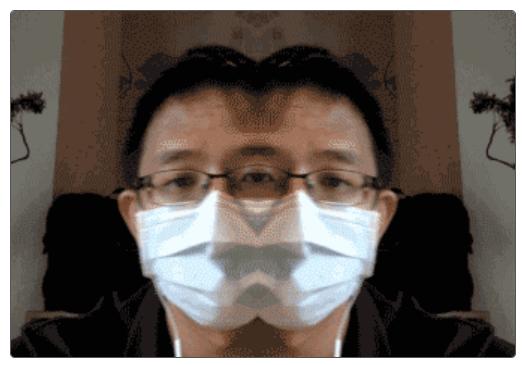

In [3]:
import cv2
import numpy as np

cap = cv2.VideoCapture('1080_1920_30fps.mp4')
output = np.zeros((360,640,3), dtype='uint8')   # 產生 640x360 的黑色背景

if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    ret, img = cap.read()
    img = cv2.resize(img, (640, 360))   # 改變影像尺寸為 640x360
    img = img[:360, :320]               # 取出 320x360 的影像
    img2 = cv2.flip(img, 1)             # 左右翻轉影像
    output[:, :320] = img               # 將 output 左邊內容換成 img
    output[:, 320:640] = img2           # 將 output 右邊內容換成 img2

    cv2.imshow('oxxostudio', output)
    if cv2.waitKey(50) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

##### 四格萬花筒效果 
延伸上方的程式碼，將背景尺寸改成 640x640，並將讀取的影像改成上下左右四格，就能做出四格萬花筒的效果。

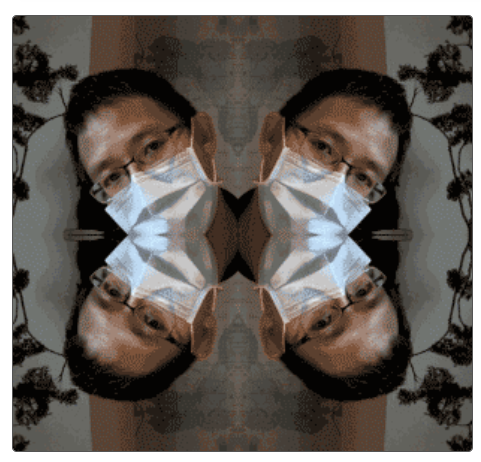

In [4]:
import cv2
import numpy as np

cap = cv2.VideoCapture('1080_1920_30fps.mp4')
output = np.zeros((640,640,3), dtype='uint8')

if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    ret, img = cap.read()
    img = cv2.resize(img,(640, 360))
    img = img[:320, :320]             # 取出 320x320 的區域
    img2 = cv2.flip(img, 1)           # 左右翻轉
    img3 = cv2.flip(img, 0)           # 上下翻轉
    img4 = cv2.flip(img, -1)          # 上下左右翻轉
    output[:320, :320] = img          # 左上
    output[:320, 320:640] = img2      # 右上
    output[320:640, :320] = img3      # 左下
    output[320:640, 320:640] = img4   # 右下

    cv2.imshow('oxxostudio', output)
    if cv2.waitKey(50) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()